In [1]:
import reciprocalspaceship as rs
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import os
import os.path
import gemmi as gm
import seaborn as sns

new_rc_params = {
    'text.usetex': False,
    "svg.fonttype": 'none',
    "font.size" : 18,
    #"font.family" : "sans-serif",
    #"font.sans-serif" : ["Nimbus Sans"],
}
plt.rcParams.update(new_rc_params)
directory_search_pattern = "careless_runs/" #directory in which to search for tabular outputs. 

This notebook is for calculating, compiling, and visualizing merging statistics. 

In [2]:
def get_careless_params(dirpath):
#     print(os.path.join(dirpath, 'inputs_params.log'))
    with open(os.path.join(dirpath, 'inputs_params.log')) as params:
        line = params.readline()
        line = params.readline()
        args_list=line.split('--')
#             print(args_list)
        p_={}
        bDisableImageScale=False
        for tag in args_list:
            if 'dmin' in tag:
                p_['DMIN']=tag.split('=')[1].split(' ')[0]
            if 'positional-encoding-frequencies' in tag:
                p_['PEF'] =tag.split('=')[1].split(' ')[0]
            if 'iterations' in tag:
                p_['ITER']=tag.split('=')[1].split(' ')[0]
            if 'mlp-layers' in tag:
                p_['MLPL']=tag.split('=')[1].split(' ')[0]
            if 'studentt-likelihood-dof' in tag:
                p_['STDOF'] =tag.split('=')[1].split(' ')[0]
            if 'image-layers' in tag:
                p_['IL']  =tag.split('=')[1].split(' ')[0]
            if 'positional-encoding-keys' in tag:
                p_['PE-keys']=tag.split('=')[1].split(' ')[0]
            if 'seed' in tag:
                p_['SEED']=tag.split('=')[1].split(' ')[0]
            if 'double-wilson-parents' in tag:
                p_['DW_list']=tag.split('=')[1].split(' ')[0]
            if 'double-wilson-r' in tag:
                DWr_list = tag.split('=')[1]
                p_['rDW']  = DWr_list.split(',')[-1]
            if 'disable-image-scales' in tag:
                bDisableImageScale=True
            if 'refine-uncertainties' in tag:
                p_['RU']=1
        if bDisableImageScale:
            p_['IL']=-1
        if 'STDOF' not in p_:
            p_['STDOF']=-1
        if 'RU' not in p_:
            p_['RU']=0
        if 'PEF' not in p_:
            p_['PEF']=0
        if 'rDW' not in p_:
            p_['rDW']=-1
        run_param=pd.DataFrame(data=p_,index=[0])
        run_param.DMIN  = run_param.DMIN.astype( 'float')
        run_param.SEED  = run_param.SEED.astype( 'int64')
        run_param.ITER  = run_param.ITER.astype( 'int64')
        run_param.STDOF = run_param.STDOF.astype('float')
        run_param.RU    = run_param.RU.astype(   'int64')
        run_param.MLPL  = run_param.MLPL.astype( 'int64')
        run_param.IL    = run_param.IL.astype(   'int64')
        run_param.rDW   = run_param.rDW.astype(  'float')
        run_param.PEF   = run_param.PEF.astype(  'int64')
        return run_param

In [3]:
!pwd

/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_test_fraction


### Run scripts to calculate merging statistics

We calculate merging statistics with a set of scripts in `./scripts`.

In [14]:
%%bash

sh ./scripts/unfriedelize_all.sh merge_2828*

./careless_runs/merge_28282862_23020_mono_cl3_mc1_grid_49


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_test_fraction/careless_runs/merge_28282862_23020_mono_cl3_mc1_grid_49/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 28284343
Submitted batch job 28284344
./careless_runs/merge_28282864_10984_mono_cl3_mc1_grid_2


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_test_fraction/careless_runs/merge_28282864_10984_mono_cl3_mc1_grid_2/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 28284373
Submitted batch job 28284374
./careless_runs/merge_28282865_27003_mono_cl3_mc1_grid_3


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_test_fraction/careless_runs/merge_28282865_27003_mono_cl3_mc1_grid_3/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 28284398
Submitted batch job 28284399
./careless_runs/merge_28282866_7713_mono_cl3_mc1_grid_4


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_test_fraction/careless_runs/merge_28282866_7713_mono_cl3_mc1_grid_4/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 28284409
Submitted batch job 28284412
./careless_runs/merge_28282867_27003_mono_cl3_mc1_grid_5


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_test_fraction/careless_runs/merge_28282867_27003_mono_cl3_mc1_grid_5/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 28284430
Submitted batch job 28284433
./careless_runs/merge_28282868_32354_mono_cl3_mc1_grid_6


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_test_fraction/careless_runs/merge_28282868_32354_mono_cl3_mc1_grid_6/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 28284450
Submitted batch job 28284451
./careless_runs/merge_28282869_10416_mono_cl3_mc1_grid_7


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_test_fraction/careless_runs/merge_28282869_10416_mono_cl3_mc1_grid_7/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 28284479
Submitted batch job 28284481
./careless_runs/merge_28282870_16900_mono_cl3_mc1_grid_8


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_test_fraction/careless_runs/merge_28282870_16900_mono_cl3_mc1_grid_8/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 28284498
Submitted batch job 28284499
./careless_runs/merge_28282871_28069_mono_cl3_mc1_grid_9


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_test_fraction/careless_runs/merge_28282871_28069_mono_cl3_mc1_grid_9/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 28284518
Submitted batch job 28284519
./careless_runs/merge_28282872_753_mono_cl3_mc1_grid_10


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_test_fraction/careless_runs/merge_28282872_753_mono_cl3_mc1_grid_10/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 28284534
Submitted batch job 28284536
./careless_runs/merge_28282873_417_mono_cl3_mc1_grid_11


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_test_fraction/careless_runs/merge_28282873_417_mono_cl3_mc1_grid_11/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 28284546
Submitted batch job 28284547
./careless_runs/merge_28282874_10705_mono_cl3_mc1_grid_12


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_test_fraction/careless_runs/merge_28282874_10705_mono_cl3_mc1_grid_12/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 28284560
Submitted batch job 28284561
./careless_runs/merge_28282875_16562_mono_cl3_mc1_grid_13


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_test_fraction/careless_runs/merge_28282875_16562_mono_cl3_mc1_grid_13/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 28284581
Submitted batch job 28284583
./careless_runs/merge_28282876_30568_mono_cl3_mc1_grid_14


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_test_fraction/careless_runs/merge_28282876_30568_mono_cl3_mc1_grid_14/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 28284599
Submitted batch job 28284601
./careless_runs/merge_28282877_4287_mono_cl3_mc1_grid_15


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_test_fraction/careless_runs/merge_28282877_4287_mono_cl3_mc1_grid_15/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 28284620
Submitted batch job 28284622
./careless_runs/merge_28282878_2314_mono_cl3_mc1_grid_16


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_test_fraction/careless_runs/merge_28282878_2314_mono_cl3_mc1_grid_16/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 28284639
Submitted batch job 28284641
./careless_runs/merge_28282879_32486_mono_cl3_mc1_grid_17


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_test_fraction/careless_runs/merge_28282879_32486_mono_cl3_mc1_grid_17/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 28284651
Submitted batch job 28284652
./careless_runs/merge_28282880_8796_mono_cl3_mc1_grid_18


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_test_fraction/careless_runs/merge_28282880_8796_mono_cl3_mc1_grid_18/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 28284673
Submitted batch job 28284674
./careless_runs/merge_28282881_11673_mono_cl3_mc1_grid_19


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_test_fraction/careless_runs/merge_28282881_11673_mono_cl3_mc1_grid_19/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 28284691
Submitted batch job 28284693
./careless_runs/merge_28282882_9926_mono_cl3_mc1_grid_20


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_test_fraction/careless_runs/merge_28282882_9926_mono_cl3_mc1_grid_20/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 28284713
Submitted batch job 28284714
./careless_runs/merge_28282883_7443_mono_cl3_mc1_grid_21


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_test_fraction/careless_runs/merge_28282883_7443_mono_cl3_mc1_grid_21/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 28284739
Submitted batch job 28284742
./careless_runs/merge_28282884_27176_mono_cl3_mc1_grid_22


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_test_fraction/careless_runs/merge_28282884_27176_mono_cl3_mc1_grid_22/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 28284749
Submitted batch job 28284751
./careless_runs/merge_28282885_18857_mono_cl3_mc1_grid_23


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_test_fraction/careless_runs/merge_28282885_18857_mono_cl3_mc1_grid_23/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 28284759
Submitted batch job 28284763
./careless_runs/merge_28282886_30625_mono_cl3_mc1_grid_24


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_test_fraction/careless_runs/merge_28282886_30625_mono_cl3_mc1_grid_24/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 28284773
Submitted batch job 28284775
./careless_runs/merge_28282887_4078_mono_cl3_mc1_grid_25


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_test_fraction/careless_runs/merge_28282887_4078_mono_cl3_mc1_grid_25/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 28284797
Submitted batch job 28284798
./careless_runs/merge_28282888_20305_mono_cl3_mc1_grid_26


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_test_fraction/careless_runs/merge_28282888_20305_mono_cl3_mc1_grid_26/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 28284822
Submitted batch job 28284823
./careless_runs/merge_28282889_22971_mono_cl3_mc1_grid_27


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_test_fraction/careless_runs/merge_28282889_22971_mono_cl3_mc1_grid_27/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 28284849
Submitted batch job 28284850
./careless_runs/merge_28282890_24272_mono_cl3_mc1_grid_28


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_test_fraction/careless_runs/merge_28282890_24272_mono_cl3_mc1_grid_28/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 28284877
Submitted batch job 28284878
./careless_runs/merge_28282891_14068_mono_cl3_mc1_grid_29


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_test_fraction/careless_runs/merge_28282891_14068_mono_cl3_mc1_grid_29/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 28284902
Submitted batch job 28284904
./careless_runs/merge_28282892_3667_mono_cl3_mc1_grid_30


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_test_fraction/careless_runs/merge_28282892_3667_mono_cl3_mc1_grid_30/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 28284913
Submitted batch job 28284915
./careless_runs/merge_28282893_28650_mono_cl3_mc1_grid_31


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_test_fraction/careless_runs/merge_28282893_28650_mono_cl3_mc1_grid_31/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 28284976
Submitted batch job 28284977
./careless_runs/merge_28282894_29795_mono_cl3_mc1_grid_32


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_test_fraction/careless_runs/merge_28282894_29795_mono_cl3_mc1_grid_32/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 28285013
Submitted batch job 28285014
./careless_runs/merge_28282895_16067_mono_cl3_mc1_grid_33


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_test_fraction/careless_runs/merge_28282895_16067_mono_cl3_mc1_grid_33/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 28285036
Submitted batch job 28285038
./careless_runs/merge_28282896_25890_mono_cl3_mc1_grid_34


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_test_fraction/careless_runs/merge_28282896_25890_mono_cl3_mc1_grid_34/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 28285051
Submitted batch job 28285052
./careless_runs/merge_28282897_30459_mono_cl3_mc1_grid_35


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_test_fraction/careless_runs/merge_28282897_30459_mono_cl3_mc1_grid_35/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 28285068
Submitted batch job 28285069
./careless_runs/merge_28282898_21660_mono_cl3_mc1_grid_36


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_test_fraction/careless_runs/merge_28282898_21660_mono_cl3_mc1_grid_36/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 28285092
Submitted batch job 28285094
./careless_runs/merge_28282899_17036_mono_cl3_mc1_grid_37


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_test_fraction/careless_runs/merge_28282899_17036_mono_cl3_mc1_grid_37/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 28285112
Submitted batch job 28285113
./careless_runs/merge_28282900_20754_mono_cl3_mc1_grid_38


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_test_fraction/careless_runs/merge_28282900_20754_mono_cl3_mc1_grid_38/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 28285132
Submitted batch job 28285134
./careless_runs/merge_28282901_14832_mono_cl3_mc1_grid_39


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_test_fraction/careless_runs/merge_28282901_14832_mono_cl3_mc1_grid_39/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 28285158
Submitted batch job 28285160
./careless_runs/merge_28282902_6304_mono_cl3_mc1_grid_40


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_test_fraction/careless_runs/merge_28282902_6304_mono_cl3_mc1_grid_40/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 28285172
Submitted batch job 28285174
./careless_runs/merge_28282903_13480_mono_cl3_mc1_grid_41


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_test_fraction/careless_runs/merge_28282903_13480_mono_cl3_mc1_grid_41/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 28285192
Submitted batch job 28285193
./careless_runs/merge_28282904_21986_mono_cl3_mc1_grid_42


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_test_fraction/careless_runs/merge_28282904_21986_mono_cl3_mc1_grid_42/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 28285212
Submitted batch job 28285214
./careless_runs/merge_28282905_30974_mono_cl3_mc1_grid_43


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_test_fraction/careless_runs/merge_28282905_30974_mono_cl3_mc1_grid_43/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 28285236
Submitted batch job 28285238
./careless_runs/merge_28282906_2947_mono_cl3_mc1_grid_44


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_test_fraction/careless_runs/merge_28282906_2947_mono_cl3_mc1_grid_44/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 28285252
Submitted batch job 28285256
./careless_runs/merge_28282907_18934_mono_cl3_mc1_grid_45


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_test_fraction/careless_runs/merge_28282907_18934_mono_cl3_mc1_grid_45/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 28285273
Submitted batch job 28285276
./careless_runs/merge_28282908_24991_mono_cl3_mc1_grid_46


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_test_fraction/careless_runs/merge_28282908_24991_mono_cl3_mc1_grid_46/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 28285289
Submitted batch job 28285291
./careless_runs/merge_28282909_3954_mono_cl3_mc1_grid_47


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_test_fraction/careless_runs/merge_28282909_3954_mono_cl3_mc1_grid_47/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 28285302
Submitted batch job 28285307
./careless_runs/merge_28282910_17823_mono_cl3_mc1_grid_48


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_test_fraction/careless_runs/merge_28282910_17823_mono_cl3_mc1_grid_48/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 28285319
Submitted batch job 28285322


In [15]:
%%bash

sh ./scripts/run_ccs.sh merge_2828*

./careless_runs/merge_28282862_23020_mono_cl3_mc1_grid_49
/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_test_fraction/careless_runs/merge_28282862_23020_mono_cl3_mc1_grid_49
4
./careless_runs/merge_28282864_10984_mono_cl3_mc1_grid_2
/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_test_fraction/careless_runs/merge_28282864_10984_mono_cl3_mc1_grid_2

./careless_runs/merge_28282865_27003_mono_cl3_mc1_grid_3
/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_test_fraction/careless_runs/merge_28282865_27003_mono_cl3_mc1_grid_3

./careless_runs/merge_28282866_7713_mono_cl3_mc1_grid_4
/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_test_fraction/careless_runs/merge_28282866_7713_mono_cl3_mc1_grid_4

./careless_runs/merge_28282867_27003_mono_cl3_mc1_grid_5
/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_test_fraction/careless_runs/merge_28282867_27003_mono_cl3_mc1_grid_5

./careless_runs/merge_28282868_32354_mono_cl3_mc1_grid_6
/n/hekstra_lab/projects/dw-examples/thermo

### Importing Zn peak height for each weighting scheme

We import the zinc peak height for each weighting scheme. 

In [4]:
params_list=[]
results_list=[]
for dirpath, dirnames, filenames in os.walk("."):
    if ('peak_heights.csv' in filenames) and (directory_search_pattern in dirpath):
        tmp=pd.read_csv(os.path.join(dirpath, 'peak_heights.csv'))
#         print(tmp)
        try:
            print(dirpath)
#             for i in range(10):
#                 print(f"i: {i}, {dirpath.split('_')[-1*i]}")
            tmp_id=int(dirpath.split('_')[-1])
            job_id=int(dirpath.split('_')[-7]) # appropriate index may vary from run to run!
            seed=int(dirpath.split('_')[-6])   # appropriate index may vary from run to run!
        except:
            print(dirpath.split('_')[-1])
#             tmp_r=np.nan
        careless_params=get_careless_params(dirpath)
        tmp["grid_id"]=tmp_id
        tmp["job_id"]=job_id
        tmp["seed"]=seed
        careless_params["grid_id"]=tmp_id
        careless_params["job_id"]=job_id
        careless_params["seed"]=seed
#         print('----------')
#         print(dirpath)
        print(f"Read-in values of grid_id: {tmp_id},  job_id: {job_id},  seed: {seed}")
        results_list.append(tmp)
        params_list.append(careless_params)
all_params =pd.concat(params_list)
all_results_peak_heights=pd.concat(results_list)

./careless_runs/merge_28282900_20754_mono_cl3_mc1_grid_38
Read-in values of grid_id: 38,  job_id: 28282900,  seed: 20754
./careless_runs/merge_28282907_18934_mono_cl3_mc1_grid_45
Read-in values of grid_id: 45,  job_id: 28282907,  seed: 18934
./careless_runs/merge_28282879_32486_mono_cl3_mc1_grid_17
Read-in values of grid_id: 17,  job_id: 28282879,  seed: 32486
./careless_runs/merge_28282875_16562_mono_cl3_mc1_grid_13
Read-in values of grid_id: 13,  job_id: 28282875,  seed: 16562
./careless_runs/merge_28282897_30459_mono_cl3_mc1_grid_35
Read-in values of grid_id: 35,  job_id: 28282897,  seed: 30459
./careless_runs/merge_28282883_7443_mono_cl3_mc1_grid_21
Read-in values of grid_id: 21,  job_id: 28282883,  seed: 7443
./careless_runs/merge_28282869_10416_mono_cl3_mc1_grid_7
Read-in values of grid_id: 7,  job_id: 28282869,  seed: 10416
./careless_runs/merge_28282872_753_mono_cl3_mc1_grid_10
Read-in values of grid_id: 10,  job_id: 28282872,  seed: 753
./careless_runs/merge_28282886_30625_mon

In [5]:
all_results_peak_heights = all_params.drop(columns=["job_id","seed"]).merge(all_results_peak_heights.drop(columns=["job_id","seed"]), on=["grid_id"])


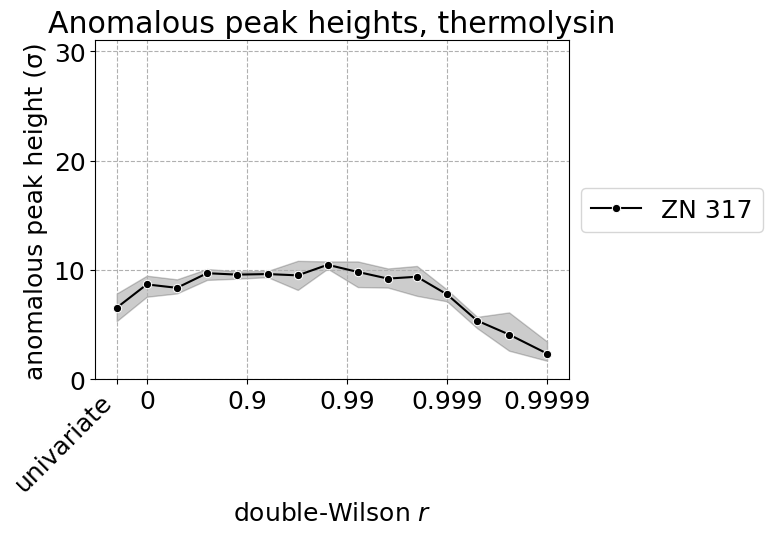

In [11]:
tmp=all_results_peak_heights.copy()
tmp=tmp.sort_values(by=["rDW"])

tmp["rDW_transformed"] = np.log10(1-tmp["rDW"])
n_atoms = 4
colors = plt.cm.viridis(np.linspace(0.3, 0.8, n_atoms))

fig,ax = plt.subplots(figsize=(8,5.7))

sns.lineplot(data=tmp,x="rDW_transformed",y="ZN 317",
             marker="o",linestyle="-",c="k",label=f"ZN 317")
# sns.lineplot(data=tmp,x="rDW_transformed",y="ZN 317.1",
#              marker="o",linestyle="-",c="gray",label=f"ZN 317")


plt.grid(linestyle='--')
plt.title("Anomalous peak heights, thermolysin")
plt.legend(loc="lower right")
plt.xlabel("double-Wilson $r$")
plt.ylabel("anomalous peak height (σ)")
plt.gca().invert_xaxis()
plt.xticks(ticks=[-4,-3,-2,-1,0, 0.303],labels=["0.9999","0.999","0.99","0.9","0","univariate"])
#ax.set_yscale("log")
plt.ylim([0,31])
ticks = ax.get_xticklabels()
for tick in ticks[-1:]:
    tick.set_rotation(45)
    tick.set_ha("right")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig("peak heights.svg",bbox_inches="tight")
plt.show()

In [13]:
results_list=[]
for dirpath, dirnames, filenames in os.walk("."):
    if ('peak_heights_W_dh_d.csv' in filenames) and (directory_search_pattern in dirpath):
        tmp=pd.read_csv(os.path.join(dirpath, 'peak_heights_W_dh_d.csv'))
#         print(tmp)
        try:
            print(dirpath)
#             for i in range(10):
#                 print(f"i: {i}, {dirpath.split('_')[-1*i]}")
            tmp_id=int(dirpath.split('_')[-1])
            job_id=int(dirpath.split('_')[-7]) # appropriate index may vary from run to run!
            seed=int(dirpath.split('_')[-6])   # appropriate index may vary from run to run!
        except:
            print(dirpath.split('_')[-1])
#             tmp_r=np.nan
        tmp["grid_id"]=tmp_id
        tmp["job_id"]=job_id
        tmp["seed"]=seed
#         print('----------')
#         print(dirpath)
        print(f"Read-in values of grid_id: {tmp_id},  job_id: {job_id},  seed: {seed}")
        results_list.append(tmp)
all_results_peak_heights_W_dh_d=pd.concat(results_list)

./careless_runs/merge_19756569_4597_mono_cl3_mc1_grid_4
Read-in values of grid_id: 4,  job_id: 19756569,  seed: 4597
./careless_runs/merge_19756572_25334_mono_cl3_mc1_grid_6
Read-in values of grid_id: 6,  job_id: 19756572,  seed: 25334
./careless_runs/merge_19756573_9373_mono_cl3_mc1_grid_7
Read-in values of grid_id: 7,  job_id: 19756573,  seed: 9373
./careless_runs/merge_19756568_26316_mono_cl3_mc1_grid_3
Read-in values of grid_id: 3,  job_id: 19756568,  seed: 26316
./careless_runs/merge_19756575_29062_mono_cl3_mc1_grid_9
Read-in values of grid_id: 9,  job_id: 19756575,  seed: 29062
./careless_runs/merge_19756592_3864_mono_cl3_mc1_grid_11
Read-in values of grid_id: 11,  job_id: 19756592,  seed: 3864
./careless_runs/merge_19756567_7468_mono_cl3_mc1_grid_2
Read-in values of grid_id: 2,  job_id: 19756567,  seed: 7468
./careless_runs/merge_19756574_4835_mono_cl3_mc1_grid_8
Read-in values of grid_id: 8,  job_id: 19756574,  seed: 4835
./careless_runs/merge_19756599_24962_mono_cl3_mc1_grid_1

In [14]:
results_list=[]
for dirpath, dirnames, filenames in os.walk("."):
    if ('peak_heights_W_dh_e.csv' in filenames) and (directory_search_pattern in dirpath):
        tmp=pd.read_csv(os.path.join(dirpath, 'peak_heights_W_dh_e.csv'))
#         print(tmp)
        try:
            print(dirpath)
#             for i in range(10):
#                 print(f"i: {i}, {dirpath.split('_')[-1*i]}")
            tmp_id=int(dirpath.split('_')[-1])
            job_id=int(dirpath.split('_')[-7]) # appropriate index may vary from run to run!
            seed=int(dirpath.split('_')[-6])   # appropriate index may vary from run to run!
        except:
            print(dirpath.split('_')[-1])
#             tmp_r=np.nan
        tmp["grid_id"]=tmp_id
        tmp["job_id"]=job_id
        tmp["seed"]=seed
#         print('----------')
#         print(dirpath)
        print(f"Read-in values of grid_id: {tmp_id},  job_id: {job_id},  seed: {seed}")
        results_list.append(tmp)
all_results_peak_heights_W_dh_e=pd.concat(results_list)

./careless_runs/merge_19756569_4597_mono_cl3_mc1_grid_4
Read-in values of grid_id: 4,  job_id: 19756569,  seed: 4597
./careless_runs/merge_19756572_25334_mono_cl3_mc1_grid_6
Read-in values of grid_id: 6,  job_id: 19756572,  seed: 25334
./careless_runs/merge_19756573_9373_mono_cl3_mc1_grid_7
Read-in values of grid_id: 7,  job_id: 19756573,  seed: 9373
./careless_runs/merge_19756568_26316_mono_cl3_mc1_grid_3
Read-in values of grid_id: 3,  job_id: 19756568,  seed: 26316
./careless_runs/merge_19756575_29062_mono_cl3_mc1_grid_9
Read-in values of grid_id: 9,  job_id: 19756575,  seed: 29062
./careless_runs/merge_19756592_3864_mono_cl3_mc1_grid_11
Read-in values of grid_id: 11,  job_id: 19756592,  seed: 3864
./careless_runs/merge_19756567_7468_mono_cl3_mc1_grid_2
Read-in values of grid_id: 2,  job_id: 19756567,  seed: 7468
./careless_runs/merge_19756574_4835_mono_cl3_mc1_grid_8
Read-in values of grid_id: 8,  job_id: 19756574,  seed: 4835
./careless_runs/merge_19756599_24962_mono_cl3_mc1_grid_1

In [15]:
all_params.reset_index(drop=True,inplace=True)
#all_params.info()
all_params.head(10)

,MLPL,IL,DMIN,ITER,SEED,DW_list,rDW,RU,STDOF,PEF,grid_id,job_id,seed
0,10,2,1.8,30000,4597,"None,0",0.50000,1,32.0,0,4,19756569,4597
1,10,2,1.8,30000,25334,"None,0",0.87500,1,32.0,0,6,19756572,25334
2,10,2,1.8,30000,9373,"None,0",0.93800,1,32.0,0,7,19756573,9373
3,10,2,1.8,30000,26316,"None,0",0.00000,1,32.0,0,3,19756568,26316
4,10,2,1.8,30000,29062,"None,0",0.98440,1,32.0,0,9,19756575,29062
5,10,2,1.8,30000,3864,"None,0",0.99610,1,32.0,0,11,19756592,3864
6,10,2,1.8,30000,7468,NaN,-1.00000,1,32.0,0,2,19756567,7468
7,10,2,1.8,30000,4835,"None,0",0.96900,1,32.0,0,8,19756574,4835
8,10,2,1.8,30000,24962,"None,0",0.99976,1,32.0,0,15,19756599,24962
9,10,2,1.8,30000,21755,"None,0",0.99990,1,32.0,0,16,19756566,21755


In [16]:
all_results_ccpred.head()

,Unnamed: 0,file,Resolution Range (Å),bin,test,Spacegroup,CCpred,grid_id,job_id,seed
0,0,thl_1p8A_grid_predictions_0.mtz,34.35 - 1.80,0,Train,P 61 2 2,0.874501,4,19756569,4597
1,1,thl_1p8A_grid_predictions_0.mtz,34.35 - 1.80,0,Test,P 61 2 2,0.857199,4,19756569,4597
2,2,thl_1p8A_grid_predictions_1.mtz,34.35 - 1.80,0,Train,P 61 2 2,0.880116,4,19756569,4597
3,3,thl_1p8A_grid_predictions_1.mtz,34.35 - 1.80,0,Test,P 61 2 2,0.854651,4,19756569,4597
0,0,thl_1p8A_grid_predictions_0.mtz,34.35 - 1.80,0,Train,P 61 2 2,0.859448,6,19756572,25334


We clean each of the dataframes generated and then combine them together.

In [17]:
all_results_ccpred = pd.melt(all_results_ccpred, id_vars=['file', 'grid_id','job_id','Resolution Range (Å)','seed','test'], value_vars=['CCpred'])
all_results_ccpred.rename(columns={'value': 'CCpred'}, inplace=True)
pivoted_df = all_results_ccpred.pivot(index=['file', 'grid_id','job_id','Resolution Range (Å)','seed'], columns='test', values='CCpred')
pivoted_df.rename(columns={'Test': 'CCpred_test','Train': 'CCpred_train'}, inplace=True)
all_results_ccpred = pivoted_df.reset_index()

In [18]:
all_params.reset_index(drop=True,inplace=True)
all_results_ccpred.dropna(inplace=True)
all_results_ccpred["delay"] = [name[-5] for name in all_results_ccpred.file]
all_results_ccpred["delay"]=all_results_ccpred["delay"].astype('int32')
all_results_ccpred.sort_values(by=["grid_id","job_id"],inplace=True)
all_results_ccpred.reset_index(inplace=True)
print(all_results_ccpred.count())
all_results_ccpred.head()

test
index                   30
file                    30
grid_id                 30
job_id                  30
Resolution Range (Å)    30
seed                    30
CCpred_test             30
CCpred_train            30
delay                   30
dtype: int64


test,index,file,grid_id,job_id,Resolution Range (Å),seed,CCpred_test,CCpred_train,delay
0,0,thl_1p8A_grid_predictions_0.mtz,2,19756567,34.35 - 1.80,7468,0.855255,0.871691,0
1,15,thl_1p8A_grid_predictions_1.mtz,2,19756567,34.35 - 1.80,7468,0.869396,0.884305,1
2,1,thl_1p8A_grid_predictions_0.mtz,3,19756568,34.35 - 1.80,26316,0.796374,0.832508,0
3,16,thl_1p8A_grid_predictions_1.mtz,3,19756568,34.35 - 1.80,26316,0.843694,0.852566,1
4,2,thl_1p8A_grid_predictions_0.mtz,4,19756569,34.35 - 1.80,4597,0.857199,0.874501,0


### Clean `cchalf`,`ccanom`, and `peak heights` tables for merging

In [19]:
all_results_peak_heights = all_results_peak_heights.drop(columns=["job_id","seed"])

for i,peak_table in enumerate([all_results_peak_heights_W_dh, 
                   all_results_peak_heights_W_dh_d, 
                   all_results_peak_heights_W_dh_e]):
    try:
        peak_table.drop(columns=["job_id","seed","CA 318","CA 319","CA 320","CA 321"], 
                                   inplace=True)
    except:
        pass
    
    all_results_peak_heights = all_results_peak_heights.merge(peak_table, 
                                                              suffixes=("",f"_{i}"),
                                                              on="grid_id")
    
all_results = all_results_ccpred.merge(all_results_peak_heights,on="grid_id")

In [20]:
all_results_ccanom = all_results_ccanom[["CCanom","grid_id","seed","Spacegroup","bin"]]
all_results_ccanom = all_results_ccanom.groupby(by=["seed","Spacegroup","bin"]).mean().reset_index(drop=True)
all_results_ccanom["grid_id"]=all_results_ccanom["grid_id"].astype("int32")


In [21]:
#all_results_cchalf1 = all_results_cchalf.groupby(by=["seed","Spacegroup","bin"]).agg({'CChalf':['mean','std']}).reset_index(drop=True)
all_results_cchalf1 = all_results_cchalf[["CChalf","grid_id","seed","Spacegroup","bin"]]
all_results_cchalf1 = all_results_cchalf1.groupby(by=["seed","Spacegroup","bin"]).mean().reset_index(drop=True)
all_results_cchalf1["grid_id"]=all_results_cchalf1["grid_id"].astype("int32")


In [22]:
all_results = all_results.merge(all_results_ccanom,on="grid_id")
all_results = all_results.merge(all_results_cchalf1,on="grid_id")
all_results = all_results.merge(all_results_NLL.drop(columns=["seed","job_id"]),on="grid_id")

In [23]:
all_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 30 non-null     int64  
 1   file                  30 non-null     object 
 2   grid_id               30 non-null     int64  
 3   job_id                30 non-null     int64  
 4   Resolution Range (Å)  30 non-null     object 
 5   seed                  30 non-null     int64  
 6   CCpred_test           30 non-null     float64
 7   CCpred_train          30 non-null     float64
 8   delay                 30 non-null     int32  
 9   ZN 317                30 non-null     float64
 10  ZN 317.1              30 non-null     float64
 11  CA 318                30 non-null     float64
 12  CA 319                30 non-null     float64
 13  CA 320                30 non-null     float64
 14  CA 321                30 non-null     float64
 15  ZN 317_0              30 

In [28]:
df_param=all_params[['IL','MLPL','ITER','STDOF','PEF','rDW','RU','grid_id','job_id','seed']].copy()

for ix, row in df_param.iterrows():
    grid_id=int(row["grid_id"])
    job_id =int(row["job_id"])
    for column in df_param.columns:
        all_results.loc[(all_results["grid_id"]==grid_id) & (all_results["job_id"]==job_id), column] =\
        df_param.loc[(df_param["grid_id"]==grid_id) & (df_param["job_id"]==job_id),column].to_numpy()[0]

all_results=all_results.infer_objects()
all_results=all_results.sort_values(by=["grid_id"])

tmp=all_results.loc[(all_results["delay"]>-1),\
                      ["delay","CCpred_train","CCpred_test","ZN 317","ZN 317.1","CA 318","CA 319","CA 320","CA 321",
                       "ZN 317_1", "ZN 317_2","ZN 317_0","CCanom", "CChalf",
                       "loss","F KLDiv","NLL","NLL_val",
                       "grid_id","job_id","IL","MLPL","ITER","STDOF","PEF","rDW","RU"]].groupby(\
                      ["job_id","IL","MLPL","ITER","STDOF","PEF","rDW","RU"]).mean().reset_index().sort_values(by=["rDW"])
all_results_avg=tmp

# all_results_avg.set_index("grid_id",inplace=True)
#all_results_avg.style.background_gradient()
all_results_avg

,job_id,IL,MLPL,ITER,STDOF,PEF,rDW,RU,delay,CCpred_train,...,ZN 317_1,ZN 317_2,ZN 317_0,CCanom,CChalf,loss,F KLDiv,NLL,NLL_val,grid_id
1,19756567,2.0,10.0,30000.0,32.0,0.0,-1.00000,1.0,0.5,0.877998,...,22.337,23.771,23.855,0.121589,0.870986,7.889649e+06,9.104914e+04,7.798600e+06,7.993009e+06,2.0
2,19756568,2.0,10.0,30000.0,32.0,0.0,0.00000,1.0,0.5,0.842537,...,22.902,24.058,24.238,0.117449,0.869578,7.897572e+06,8.998143e+04,7.807590e+06,8.016527e+06,3.0
3,19756569,2.0,10.0,30000.0,32.0,0.0,0.50000,1.0,0.5,0.877308,...,23.182,24.561,24.774,0.121289,0.883372,7.886949e+06,8.702291e+04,7.799926e+06,7.988322e+06,4.0
4,19756571,2.0,10.0,30000.0,32.0,0.0,0.75000,1.0,0.5,0.875401,...,25.172,25.638,26.182,0.108736,0.892805,7.881018e+06,8.199502e+04,7.799023e+06,inf,5.0
5,19756572,2.0,10.0,30000.0,32.0,0.0,0.87500,1.0,0.5,0.868634,...,24.837,25.074,25.726,0.127545,0.901746,7.901017e+06,7.760206e+04,7.823415e+06,7.996520e+06,6.0
6,19756573,2.0,10.0,30000.0,32.0,0.0,0.93800,1.0,0.5,0.878675,...,27.444,26.939,27.889,0.111246,0.909559,7.868385e+06,7.763055e+04,7.790755e+06,inf,7.0
7,19756574,2.0,10.0,30000.0,32.0,0.0,0.96900,1.0,0.5,0.872710,...,27.524,26.748,27.892,0.127990,0.918598,7.871617e+06,7.965258e+04,7.791964e+06,inf,8.0
8,19756575,2.0,10.0,30000.0,32.0,0.0,0.98440,1.0,0.5,0.853584,...,28.082,27.276,28.235,0.137743,0.922351,7.883177e+06,8.790743e+04,7.795269e+06,7.991115e+06,9.0
9,19756576,2.0,10.0,30000.0,32.0,0.0,0.99220,1.0,0.5,0.876949,...,28.718,27.721,28.706,0.127505,0.918739,7.892542e+06,1.051544e+05,7.787388e+06,inf,10.0
10,19756592,2.0,10.0,30000.0,32.0,0.0,0.99610,1.0,0.5,0.877267,...,29.123,28.090,29.097,0.140073,0.922696,7.910841e+06,1.372632e+05,7.773577e+06,7.921782e+06,11.0


In [29]:
## add the peak heights obtained from CCTBX (see Dalton et al. 2022)

all_results_avg.loc[15, "ZN 317"] = 20.07
all_results_avg.loc[15, "CA 318"] = 6.17
all_results_avg.loc[15, "CA 319"] = 3.81
all_results_avg.loc[15, "CA 320"] = 7.05
all_results_avg.loc[15, "CA 321"] = 7.25
all_results_avg.loc[15, "rDW"] = -3

all_results_avg

,job_id,IL,MLPL,ITER,STDOF,PEF,rDW,RU,delay,CCpred_train,...,ZN 317_1,ZN 317_2,ZN 317_0,CCanom,CChalf,loss,F KLDiv,NLL,NLL_val,grid_id
1,19756567.0,2.0,10.0,30000.0,32.0,0.0,-1.00000,1.0,0.5,0.877998,...,22.337,23.771,23.855,0.121589,0.870986,7.889649e+06,9.104914e+04,7.798600e+06,7.993009e+06,2.0
2,19756568.0,2.0,10.0,30000.0,32.0,0.0,0.00000,1.0,0.5,0.842537,...,22.902,24.058,24.238,0.117449,0.869578,7.897572e+06,8.998143e+04,7.807590e+06,8.016527e+06,3.0
3,19756569.0,2.0,10.0,30000.0,32.0,0.0,0.50000,1.0,0.5,0.877308,...,23.182,24.561,24.774,0.121289,0.883372,7.886949e+06,8.702291e+04,7.799926e+06,7.988322e+06,4.0
4,19756571.0,2.0,10.0,30000.0,32.0,0.0,0.75000,1.0,0.5,0.875401,...,25.172,25.638,26.182,0.108736,0.892805,7.881018e+06,8.199502e+04,7.799023e+06,inf,5.0
5,19756572.0,2.0,10.0,30000.0,32.0,0.0,0.87500,1.0,0.5,0.868634,...,24.837,25.074,25.726,0.127545,0.901746,7.901017e+06,7.760206e+04,7.823415e+06,7.996520e+06,6.0
6,19756573.0,2.0,10.0,30000.0,32.0,0.0,0.93800,1.0,0.5,0.878675,...,27.444,26.939,27.889,0.111246,0.909559,7.868385e+06,7.763055e+04,7.790755e+06,inf,7.0
7,19756574.0,2.0,10.0,30000.0,32.0,0.0,0.96900,1.0,0.5,0.872710,...,27.524,26.748,27.892,0.127990,0.918598,7.871617e+06,7.965258e+04,7.791964e+06,inf,8.0
8,19756575.0,2.0,10.0,30000.0,32.0,0.0,0.98440,1.0,0.5,0.853584,...,28.082,27.276,28.235,0.137743,0.922351,7.883177e+06,8.790743e+04,7.795269e+06,7.991115e+06,9.0
9,19756576.0,2.0,10.0,30000.0,32.0,0.0,0.99220,1.0,0.5,0.876949,...,28.718,27.721,28.706,0.127505,0.918739,7.892542e+06,1.051544e+05,7.787388e+06,inf,10.0
10,19756592.0,2.0,10.0,30000.0,32.0,0.0,0.99610,1.0,0.5,0.877267,...,29.123,28.090,29.097,0.140073,0.922696,7.910841e+06,1.372632e+05,7.773577e+06,7.921782e+06,11.0


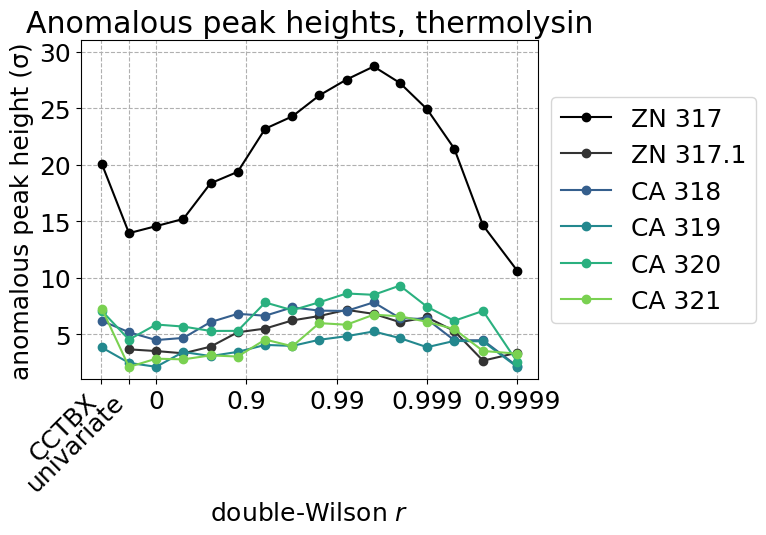

In [31]:
tmp=all_results_avg.copy()
tmp=tmp.sort_values(by=["rDW"])

n_atoms = 4
colors = plt.cm.viridis(np.linspace(0.3, 0.8, n_atoms))

fig,ax = plt.subplots(figsize=(8,5.7))
for atom in ["ZN 317"]:
    plt.plot(np.log10(1-tmp["rDW"]),tmp[atom],'ko-',label=f"{atom}")
for atom in ["ZN 317.1"]:
    plt.plot(np.log10(1-tmp["rDW"]),tmp[atom],'o-',c="#333333",label=f"{atom}")
for n,atom in enumerate(["CA 318","CA 319","CA 320","CA 321"]):
    plt.plot(np.log10(1-tmp["rDW"]),tmp[atom],'o-',color=colors[n],label=f"{atom}")
    


plt.grid(linestyle='--')
plt.title("Anomalous peak heights, thermolysin")
plt.legend(loc="lower right")
plt.xlabel("double-Wilson $r$")
plt.ylabel("anomalous peak height (σ)")
plt.gca().invert_xaxis()
plt.xticks(ticks=[-4,-3,-2,-1,0, 0.303,0.606],labels=["0.9999","0.999","0.99","0.9","0","univariate", "CCTBX"])
#ax.set_yscale("log")
plt.ylim([1,31])
ticks = ax.get_xticklabels()
for tick in ticks[-2:]:
    tick.set_rotation(45)
    tick.set_ha("right")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig("peak heights.svg",bbox_inches="tight")
plt.show()

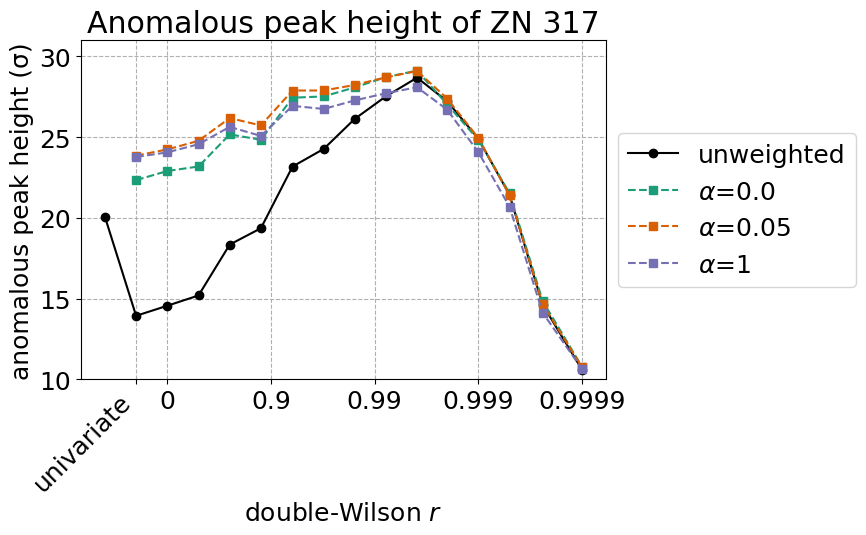

In [27]:
tmp=all_results_avg.copy()
tmp=tmp.sort_values(by=["rDW"])

n_atoms = 4
cbrewer_colors=["#1b9e77","#d95f02","#7570b3"]
alphas= [0.0,0.05,1]
fig,ax = plt.subplots(figsize=(9,5.7))
for atom in ["ZN 317"]:
    plt.plot(np.log10(1-tmp["rDW"]),tmp[atom],'ko-',label="unweighted")
for i,atom in enumerate(["ZN 317_1","ZN 317_0","ZN 317_2"]):
    plt.plot(np.log10(1-tmp["rDW"]),
             tmp[atom],
             's--',
             color=cbrewer_colors[i],
             label=r"$\alpha$="+str(alphas[i]))


plt.grid(linestyle='--')
plt.title("Anomalous peak height of ZN 317")
plt.legend(loc="lower right")
plt.xlabel("double-Wilson $r$")
plt.ylabel("anomalous peak height (σ)")
plt.gca().invert_xaxis()
plt.xticks(ticks=[-4,-3,-2,-1,0, 0.303],labels=["0.9999","0.999","0.99","0.9","0","univariate"])
#ax.set_yscale("log")
plt.ylim([10,31])
ticks = ax.get_xticklabels()
ticks[-1].set_rotation(45)
ticks[-1].set_ha("right")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig("peak heights-weighting.svg",bbox_inches="tight")
plt.show()

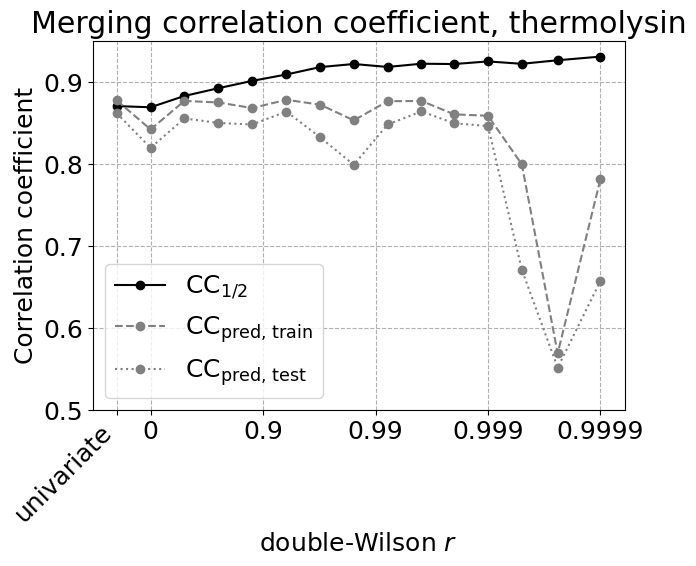

In [45]:
fig,ax = plt.subplots(figsize=(7,6))

plt.plot(np.log10(1-tmp["rDW"]),tmp["CChalf"],'ko-',label=r"CC$_\text{1/2}$")
plt.plot(np.log10(1-tmp["rDW"]),tmp["CCpred_train"],'o--',color="gray",label=r"CC$_\text{pred, train}$")
plt.plot(np.log10(1-tmp["rDW"]),tmp["CCpred_test"],'o:',color="gray",label=r"CC$_\text{pred, test}$")

plt.grid(linestyle="--")
plt.title("Merging correlation coefficient, thermolysin")
plt.legend(loc="lower right")
plt.xlabel("double-Wilson $r$")
plt.ylabel("Correlation coefficient")
plt.gca().invert_xaxis()
plt.xticks(ticks=[-4,-3,-2,-1,0, 0.303],labels=["0.9999","0.999","0.99","0.9","0","univariate"])
#ax.set_yscale("log")
plt.ylim([0.5,0.95])
ticks = ax.get_xticklabels()
ticks[-1].set_rotation(45)
ticks[-1].set_ha("right")
ax.legend(loc='lower left')
plt.tight_layout()
plt.savefig("CCs.svg",bbox_inches="tight")
plt.show()

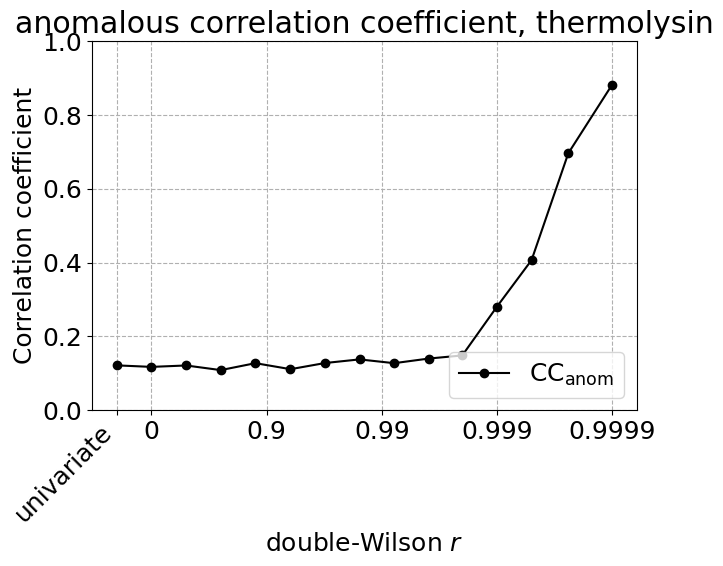

In [46]:
fig,ax = plt.subplots(figsize=(7,6))

plt.plot(np.log10(1-tmp["rDW"]),tmp["CCanom"],'ko-',label=r"CC$_\text{anom}$")

plt.grid(linestyle="--")
plt.title("anomalous correlation coefficient, thermolysin")
plt.legend(loc="lower right")
plt.xlabel("double-Wilson $r$")
plt.ylabel("Correlation coefficient")
plt.gca().invert_xaxis()
plt.xticks(ticks=[-4,-3,-2,-1,0, 0.303],labels=["0.9999","0.999","0.99","0.9","0","univariate"])
#ax.set_yscale("log")
plt.ylim([0,1])
ticks = ax.get_xticklabels()
ticks[-1].set_rotation(45)
ticks[-1].set_ha("right")
ax.legend(loc='lower right')
plt.tight_layout()
plt.savefig("CCanom.svg",bbox_inches="tight")
plt.show()

In [58]:
max_nll_val = tmp["NLL_val"].replace(np.inf,np.nan).dropna().max()

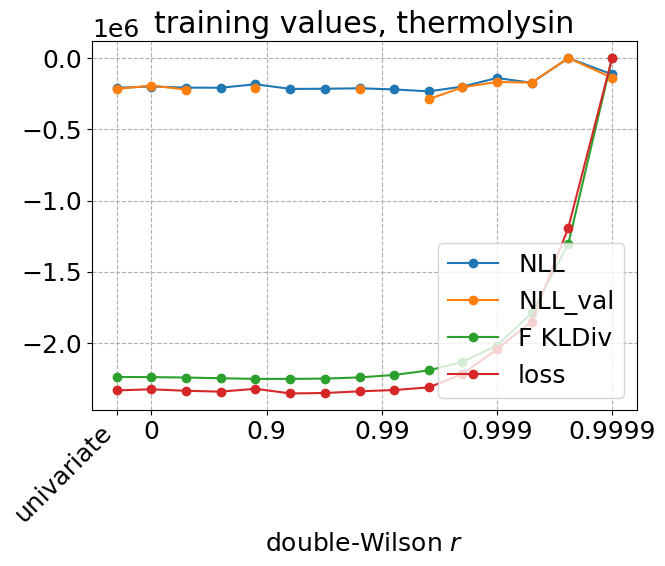

In [61]:
fig,ax = plt.subplots(figsize=(7,6))

plt.plot(np.log10(1-tmp["rDW"]),tmp["NLL"]-tmp["NLL"].max(),'o-',label=r"NLL")
plt.plot(np.log10(1-tmp["rDW"]),tmp["NLL_val"]-max_nll_val,'o-',label=r"NLL_val")
plt.plot(np.log10(1-tmp["rDW"]),tmp["F KLDiv"]-tmp["F KLDiv"].max(),'o-',label=r"F KLDiv")
plt.plot(np.log10(1-tmp["rDW"]),tmp["loss"]-tmp["loss"].max(),'o-',label=r"loss")

plt.grid(linestyle="--")
plt.title("training values, thermolysin")
plt.legend(loc="lower right")
plt.xlabel("double-Wilson $r$")

plt.gca().invert_xaxis()
plt.xticks(ticks=[-4,-3,-2,-1,0, 0.303],labels=["0.9999","0.999","0.99","0.9","0","univariate"])
#ax.set_yscale("log")
ticks = ax.get_xticklabels()
ticks[-1].set_rotation(45)
ticks[-1].set_ha("right")
ax.legend(loc='lower right')
plt.tight_layout()
plt.savefig("CCanom.svg",bbox_inches="tight")
plt.show()

In [39]:
%%bash 

mkdir ./pymol
cd pymol
cp -r ../careless_runs/merge_19756592_3864_mono_cl3_mc1_grid_11/run_refinement/2tli_refine_001.pdb ./2tli_refine_001.pdb
cp -r ../careless_runs/merge_19756592_3864_mono_cl3_mc1_grid_11/run_omit_1/2tli_occ0_ions_refine_001.mtz omit_11.mtz
cp -r ../careless_runs/merge_19756567_7468_mono_cl3_mc1_grid_2/run_omit_1/2tli_occ0_ions_refine_001.mtz omit_2.mtz